In [1]:
from Outlook_agent import outlook_agent
from composio_langgraph import ComposioToolSet


In [2]:
from dotenv import load_dotenv
import os
# from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI
from pydantic_ai.models.google import GoogleModel
from pydantic_ai.providers.google import GoogleProvider
load_dotenv()
import logfire


google_api_key=os.getenv('google_api_key')
pse=os.getenv('pse')
openai_api_key=os.getenv('openai_api_key')
composio_api_key=os.getenv('composio_api_key')
logfire_token=os.getenv('logfire_token')
import logfire
logfire.configure(token=logfire_token)
logfire.instrument_pydantic_ai()
api_keys={
    'google_api_key':google_api_key,
    'pse':pse,
    'openai_api_key':openai_api_key,
    'composio_key':composio_api_key
}
llms={'pydantic_llm':GoogleModel('gemini-2.5-flash-preview-05-20', provider=GoogleProvider(api_key=api_keys['google_api_key'])),
            #   'langchain_llm':ChatGoogleGenerativeAI(google_api_key=api_keys['google_api_key'], model='gemini-2.0-flash', temperature=0.3),
              'openai_llm':ChatOpenAI(api_key=api_keys['openai_api_key'])}

Logfire project URL: ]8;id=845512;https://logfire-us.pydantic.dev/padioutristan/outlook-agent\https://logfire-us.pydantic.dev/padioutristan/outlook-agent]8;;\

In [3]:
toolset=ComposioToolSet(api_key=api_keys['composio_key'])

In [4]:
agent=outlook_agent(api_keys=api_keys)

c:\Users\trist\OneDrive\Desktop\important\ai_portfolio\Outlook_agent\.venv\Lib\site-packages\composio\client\collections.py:1183: UserWarning: Using all actions of an app is not recommended for production.Learn more: https://docs.composio.dev/patterns/tools/use-tools/use-specific-actions

Give Feedback / Get Help:
    On GitHub: https://github.com/ComposioHQ/composio/issues/new
    On Discord: https://dub.composio.dev/discord
    On Email: tech@composio.dev
    Talk to us on Intercom: https://composio.dev
    Book a call with us: https://composio.dev/redirect?url=https://calendly.com/composiohq/support?utm_source=py-sdk-logs&utm_campaign=calendly
If you need to debug this error, set `COMPOSIO_LOGGING_LEVEL=debug`.
  warnings.warn(
c:\Users\trist\OneDrive\Desktop\important\ai_portfolio\Outlook_agent\.venv\Lib\site-packages\composio\client\collections.py:1183: UserWarning: Using all actions of an app is not recommended for production.Learn more: https://docs.composio.dev/patterns/tools/u

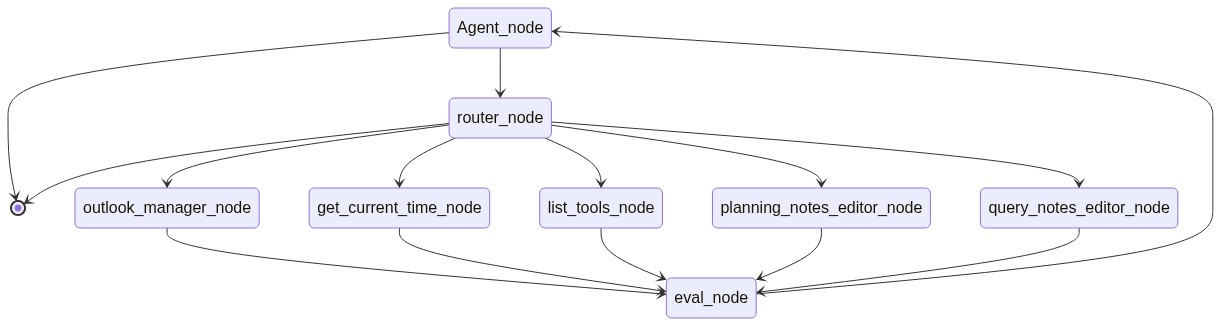

In [5]:
agent.display_graph()

In [6]:
agent.chat('list tools')

14:15:17.493 run graph None
14:15:17.500   run node Agent_node
14:15:17.506     plan_agent run
14:15:17.508       chat gemini-2.5-flash-preview-05-20
14:15:18.707   run node router_node
14:15:18.708   run node list_tools_node
14:15:18.709   run node eval_node
14:15:18.711     agent run
14:15:18.713       chat gemini-2.5-flash-preview-05-20
14:15:20.350   run node Agent_node
14:15:20.356     plan_agent run
14:15:20.357       chat gemini-2.5-flash-preview-05-20
14:15:21.677   run node router_node


State(node_messages_dict={'agent_node': plan_shema(tasks=[task_shema(task_status='completed', task_reason='The tools have been listed successfully in the previous turn.', task='list tools')], manager_tool='End', action='End', task='End'), 'List_tools': {'list_tools': {'managers': {'Outlook Manager': {'actions': {'OUTLOOK_DOWNLOAD_OUTLOOK_ATTACHMENT': {'description': "Downloads a specific file attachment from an email message in a microsoft outlook mailbox; the attachment must contain 'contentbytes' (binary data) and not be a link or embedded item."}, 'OUTLOOK_OUTLOOK_CALENDAR_CREATE_EVENT': {'description': 'Creates a new outlook calendar event, ensuring `start datetime` is chronologically before `end datetime`.'}, 'OUTLOOK_OUTLOOK_CREATE_CONTACT': {'description': "Creates a new contact in a microsoft outlook user's contacts folder."}, 'OUTLOOK_OUTLOOK_CREATE_DRAFT': {'description': 'Creates an outlook email draft with subject, body, recipients, and an optional attachment; attachments r

In [7]:
agent.state.node_messages_list

[{'List_tools': {'list_tools': {'managers': {'Outlook Manager': {'actions': {'OUTLOOK_DOWNLOAD_OUTLOOK_ATTACHMENT': {'description': "Downloads a specific file attachment from an email message in a microsoft outlook mailbox; the attachment must contain 'contentbytes' (binary data) and not be a link or embedded item."},
       'OUTLOOK_OUTLOOK_CALENDAR_CREATE_EVENT': {'description': 'Creates a new outlook calendar event, ensuring `start datetime` is chronologically before `end datetime`.'},
       'OUTLOOK_OUTLOOK_CREATE_CONTACT': {'description': "Creates a new contact in a microsoft outlook user's contacts folder."},
       'OUTLOOK_OUTLOOK_CREATE_DRAFT': {'description': 'Creates an outlook email draft with subject, body, recipients, and an optional attachment; attachments require a name, mimetype, and content.'},
       'OUTLOOK_OUTLOOK_GET_CONTACT': {'description': "Retrieves a specific outlook contact by its `contact id` from the contacts of a specified `user id` (defaults to 'me' fo

In [12]:
agent.state.node_messages_dict

{'List_tools': {'list_tools': {'managers': {'Outlook Manager': {'actions': {'OUTLOOK_DOWNLOAD_OUTLOOK_ATTACHMENT': {'description': "Downloads a specific file attachment from an email message in a microsoft outlook mailbox; the attachment must contain 'contentbytes' (binary data) and not be a link or embedded item."},
      'OUTLOOK_OUTLOOK_CALENDAR_CREATE_EVENT': {'description': 'Creates a new outlook calendar event, ensuring `start datetime` is chronologically before `end datetime`.'},
      'OUTLOOK_OUTLOOK_CREATE_CONTACT': {'description': "Creates a new contact in a microsoft outlook user's contacts folder."},
      'OUTLOOK_OUTLOOK_CREATE_DRAFT': {'description': 'Creates an outlook email draft with subject, body, recipients, and an optional attachment; attachments require a name, mimetype, and content.'},
      'OUTLOOK_OUTLOOK_GET_CONTACT': {'description': "Retrieves a specific outlook contact by its `contact id` from the contacts of a specified `user id` (defaults to 'me' for the